<a href="https://colab.research.google.com/github/santhrakrishna/python/blob/main/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from google.colab import files
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

## **Loading our dataset and Exploratory Data Analysis (EDA)**

In [2]:
data = pd.read_csv('/content/customer_train.csv')

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


## ***The drop method is used to remove specific columns (or rows) from the DataFrame. In this case, the columns parameter specifies that we are dropping columns. The list ['Unnamed: 0.1', 'Unnamed: 0','Z_CostContact','Z_Revenue'] contains the names of the columns to be dropped.***

In [4]:
data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','Z_CostContact','Z_Revenue'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [6]:
df = data
# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Summary statistics for numerical columns
numerical_summary = df.describe()

# Summary of categorical columns
categorical_summary = df.describe(include=['O'])

# Check for missing values
missing_values = df.isnull().sum()

# Output the summaries and missing values
print('Numerical Summary:\
', numerical_summary)
print('\
Categorical Summary:\
', categorical_summary)
print('\
Missing Values:\
', missing_values)

Numerical Summary:                  ID   Year_Birth        Income      Kidhome     Teenhome  \
count   1680.000000  1680.000000  1.663000e+03  1680.000000  1680.000000   
mean    5551.728571  1968.847619  5.201434e+07     0.452381     0.500000   
std     3238.155703    12.027192  2.148248e+07     0.546901     0.550055   
min        0.000000  1893.000000  1.730000e+06     0.000000     0.000000   
25%     2823.250000  1960.000000  3.568800e+07     0.000000     0.000000   
50%     5381.000000  1970.000000  5.125000e+07     0.000000     0.000000   
75%     8370.750000  1977.000000  6.812200e+07     1.000000     1.000000   
max    11191.000000  1996.000000  1.623970e+08     2.000000     2.000000   

           Recency       MntCoke      MntFruits  MntMeatProducts  \
count  1680.000000  1.680000e+03    1680.000000     1.680000e+03   
mean     49.083333  3.048994e+05   25918.452381     1.657738e+05   
std      28.930637  3.387051e+05   39532.059109     2.242424e+05   
min       0.000000  0.00

* Numerical Summary: It provides statistical
summaries for each numerical column in the DataFrame, including ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, and Response.

* Categorical Summary: It provides summaries for two categorical columns in the DataFrame, including Education and Marital_Status.

* Missing Values: It provides the count of missing values for each column in the DataFrame. This helps identify columns with missing data that may need further investigation or handling.

This output helps to understand the data's structure, distribution, and potential issues such as missing values.

   









ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64


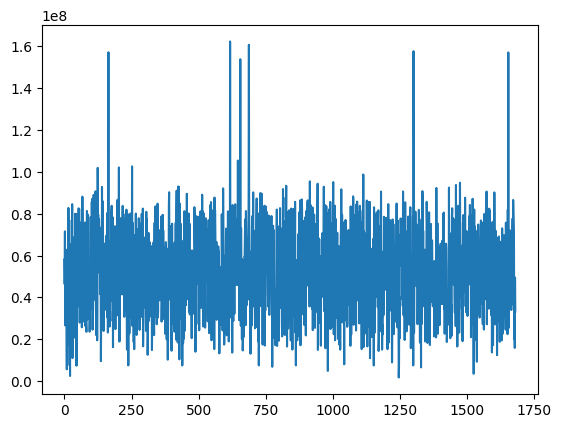

In [7]:
# Impute missing values in the 'Income' column with the mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

# Check for remaining missing values
print(df.isnull().sum())

plt.plot(data["Income"])

This code imputes missing values in the 'Income' column with the mean and then checks for any remaining missing values. Finally, it plots the 'Income' column from the original dataset data





In [8]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,1680.000000,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,...,2.670833,5.789286,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,0.144048
std,3238.155703,12.027192,2.137345e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,...,2.972874,3.245504,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.351243
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2823.250000,1960.000000,3.579075e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5381.000000,1970.000000,5.144550e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8370.750000,1977.000000,6.789750e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Statitics And Data Visualization**

<ipython-input-9-9bcc9960e9af>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


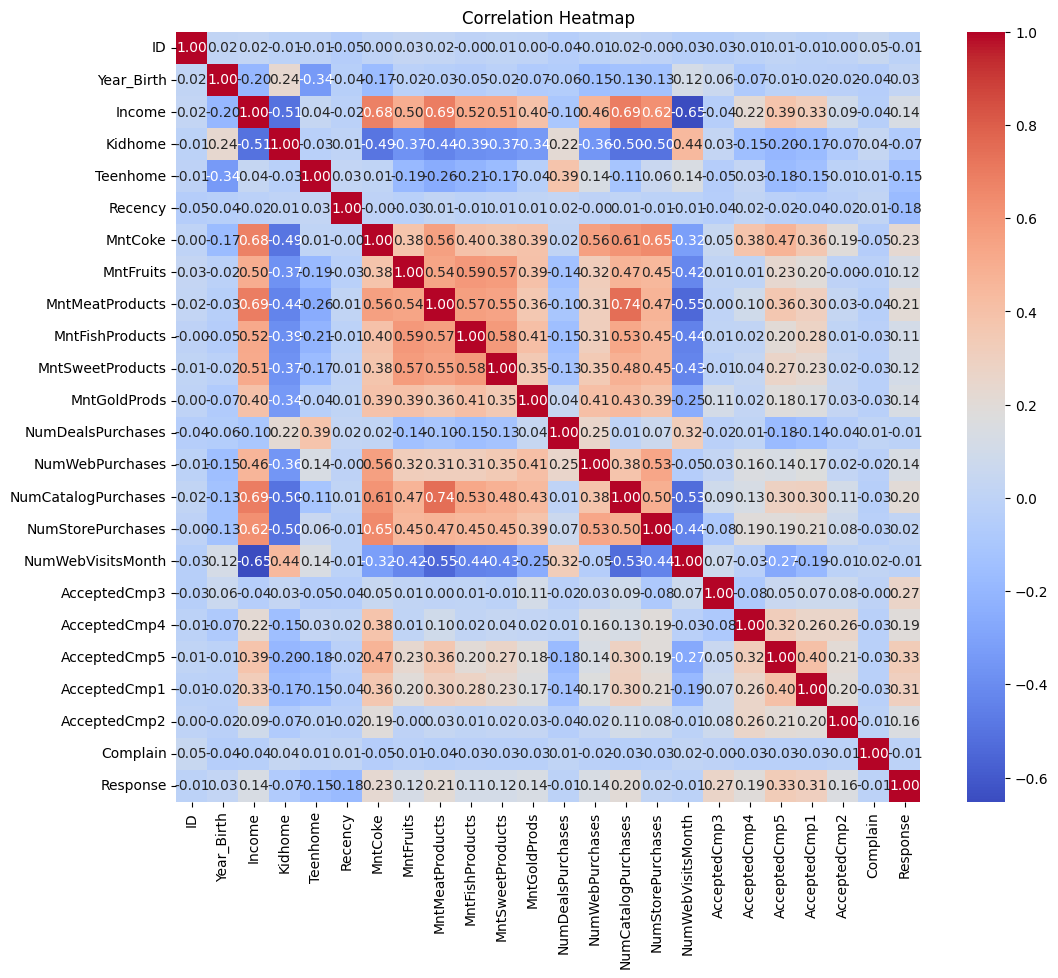

In [9]:
# Calculate correlations (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

* 1 indicates a perfectly negative correlation (as one variable increases, the other variable tends to decrease proportionally).
* 0 indicates no correlation between the variables.
* 1 indicates a perfectly positive correlation (as one variable increases, the other variable tends to increase proportionally).
** There is a strong positive correlation between income and spending score. When income increases, spending score will also increase.
** There is a weak positive correlation between age and spending score. when age increase, spending score will increase slightly.
The color of each square will indicate the strength and direction of the correlation between the two variables represented by that row and column.


## **Visualization of data using graphs and charts**

In [10]:
# Setting the background color for plots
plt.figure(facecolor='white')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

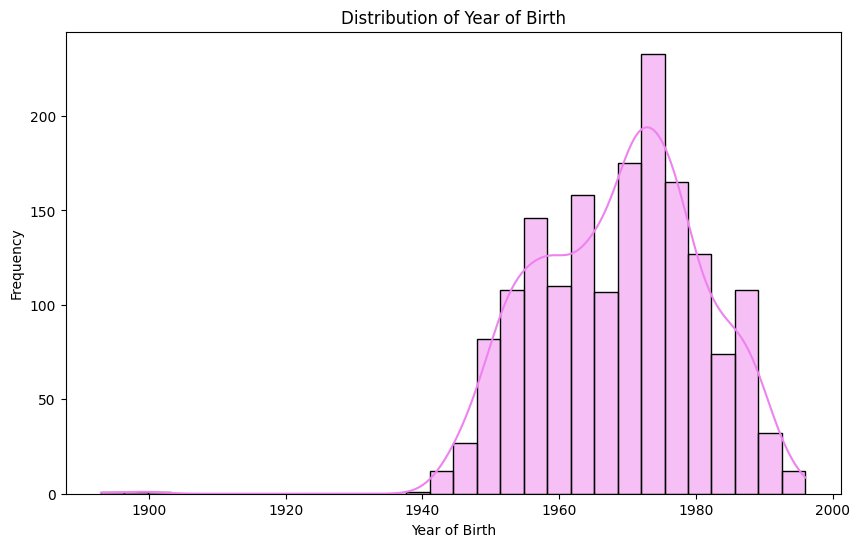

In [11]:
# Distribution of Year_Birth
plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Birth'], bins=30, kde=True, color='violet')
plt.title('Distribution of Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

Interpretation:
* The data likely covers people born between 1900 and 2000.
* The highest frequency might be around 1970 (assuming the tallest bar is there).
*The distribution might be centered around this year with frequencies tapering off towards both ends (1900 and 2000). This suggests a potentially bell-shaped distribution (normal distribution).

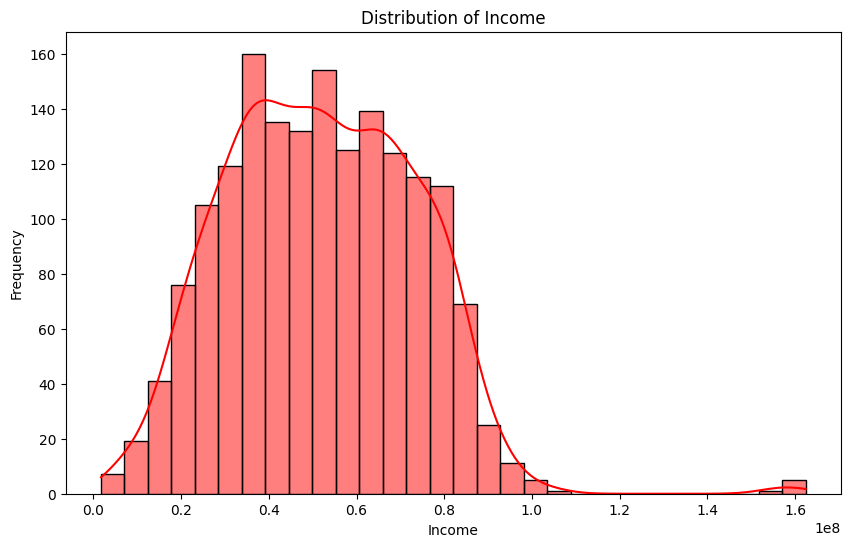

In [12]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Income'] < 200000000]['Income'], bins=30, kde=True, color='red')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The resulting plot is a histogram, which visually summarizes the distribution of income for people in the data (with income below 200 million). Here are the key elements:

X-axis (Income): Represents the range of income values
Y-axis (Frequency): Represents the number of people in each income range.

The distribution appears to be right-skewed, meaning there are more people towards the lower income ranges (left side) and fewer people with higher incomes (right side). This is evident from the longer tail extending towards the right side of the histogram.
**Overall, this histogram suggests that income in your data is not evenly distributed. There's a larger concentration of people with lower incomes compared to those with very high incomes.**

<ipython-input-13-a4aea6c489f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='viridis')


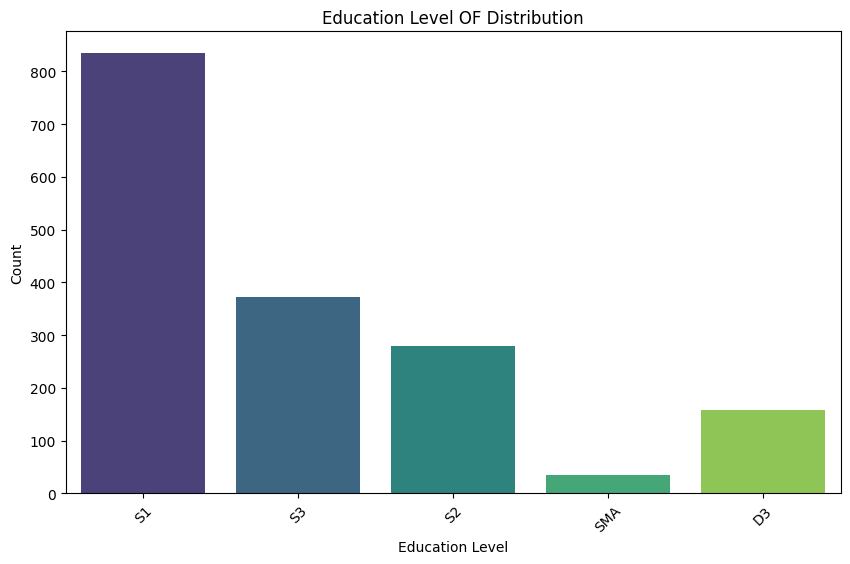

In [13]:
# Education level
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df, palette='viridis')
plt.title('Education Level OF Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Description:

X-axis (Education Level): Represents the different education levels present in your data, likely abbreviated (S1, S3, SMA, D3).
Y-axis (Count): Represents the number of people in each education level category. The scale goes from 0 to 800, indicating the highest count is 800 (or less).
Interpretation:

There are four education levels represented in the data: S1, S3, SMA, and D3 (exact meanings depend on your data context).
The distribution is likely not uniform, with a peak around 800 (assuming the tallest bar is there).
**"S1" might be the most common education level based on the highest count (assuming the tallest bar is for S1)**

Here are some possibilities:

S1: Could represent "Secondary School First Level" (possibly incomplete high school).
S3: Could represent "Secondary School Third Level" (possibly high school diploma).
SMA: Could represent "Secondary Middle Academy" .
D3: Could represent "Diploma Level 3" (possibly a vocational diploma).
**overall, highest education level is S1 and lowest education level is SMA**

<ipython-input-14-9057973b2153>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=df, palette='gray')


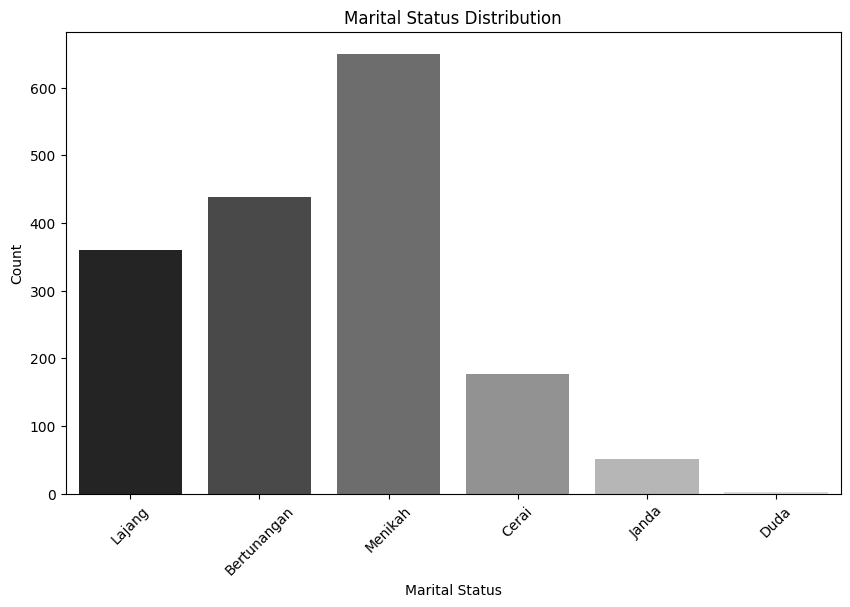

In [14]:
# Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df, palette='gray')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Interpretation:

** There are six marital statuses represented in the data: Lajang (Single), Bertunangan (Engaged), Menikah (Married), Cerai (Divorced), Janda (Widowed), Duda (Widower).
** The distribution is likely not uniform, with a peak around 400 (assuming the tallest bar is there).
**"Menikah" might be the most common marital status based on the highest count (assuming the tallest bar is for Menikah).

In [15]:
# Setting the background color for plots
plt.figure(facecolor='gray')

# Create a new DataFrame to analyze Kidhome and Teenhome impact on purchasing behavior
purchasing_behavior = df[['Kidhome', 'Teenhome', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].copy()

# Aggregate the purchasing behavior by the number of kids and teens at home
purchasing_behavior_grouped = purchasing_behavior.groupby(['Kidhome', 'Teenhome']).mean().reset_index()

# Melt the DataFrame to make it suitable for sns.barplot
purchasing_behavior_melted = pd.melt(purchasing_behavior_grouped, id_vars=['Kidhome', 'Teenhome'], var_name='Product', value_name='Average Purchase Amount')


<Figure size 640x480 with 0 Axes>

*  Setting the background color for plots
*Creating a new DataFrame called purchasing_behavior.
* Grouping and Averaging  groups the data in purchasing_behavior by:
'Kidhome': The number of kids at home.
'Teenhome': The number of teenagers at home.
Then, it calculates the average (mean()) of each product category ('MntCoke' to 'MntGoldProds') for each combination of kids and teenagers.
Finally, .reset_index() converts the grouping variables (Kidhome and Teenhome) back into regular columns in the DataFrame.
*  Melting the DataFrame (for bar chart):
the purchasing_behavior_melted DataFrame, you can see how the average purchase amount for each product category (e.g., MntCoke) varies depending on the number of kids and teenagers at home. This can help you understand the relationship between household demographics and purchasing behavior.

<ipython-input-16-a440bd98c5cd>:9: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x='Product', y='Average Purchase Amount', hue='Kidhome', data=purchasing_behavior_melted, palette=palette1)


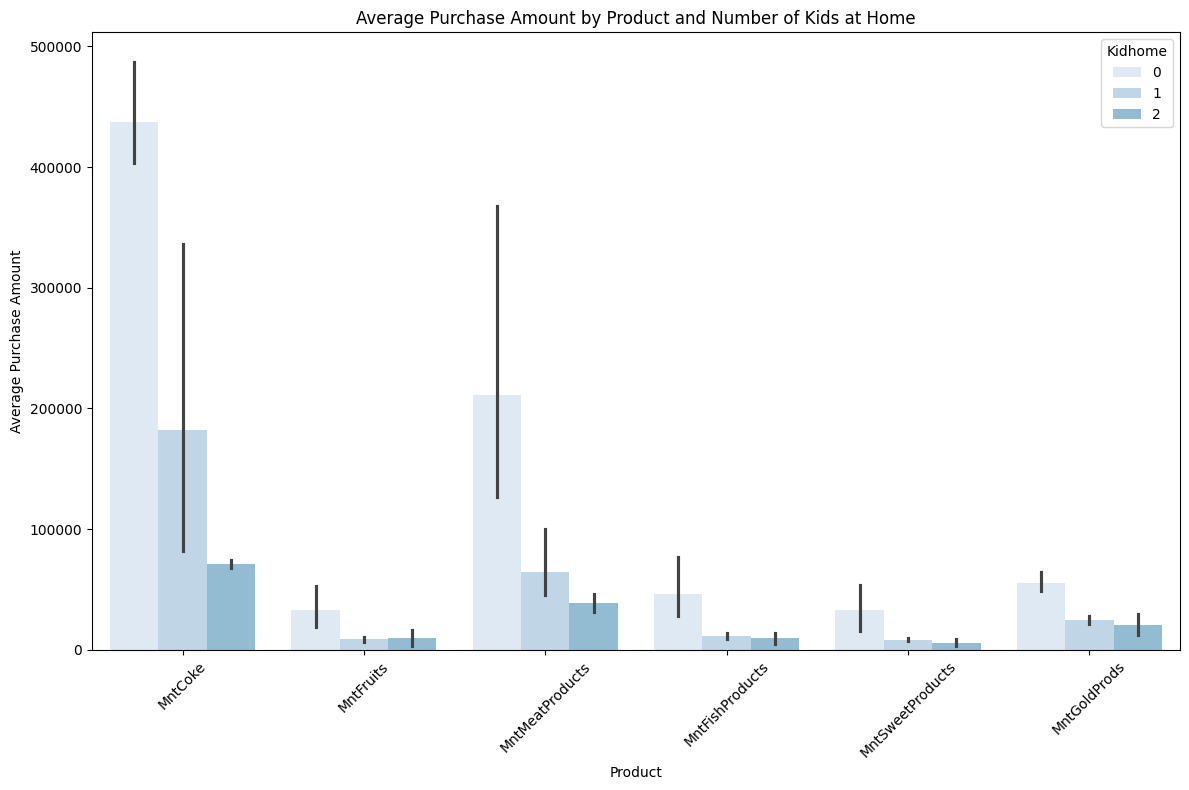

<ipython-input-16-a440bd98c5cd>:17: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x='Product', y='Average Purchase Amount', hue='Teenhome', data=purchasing_behavior_melted, palette=palette2)


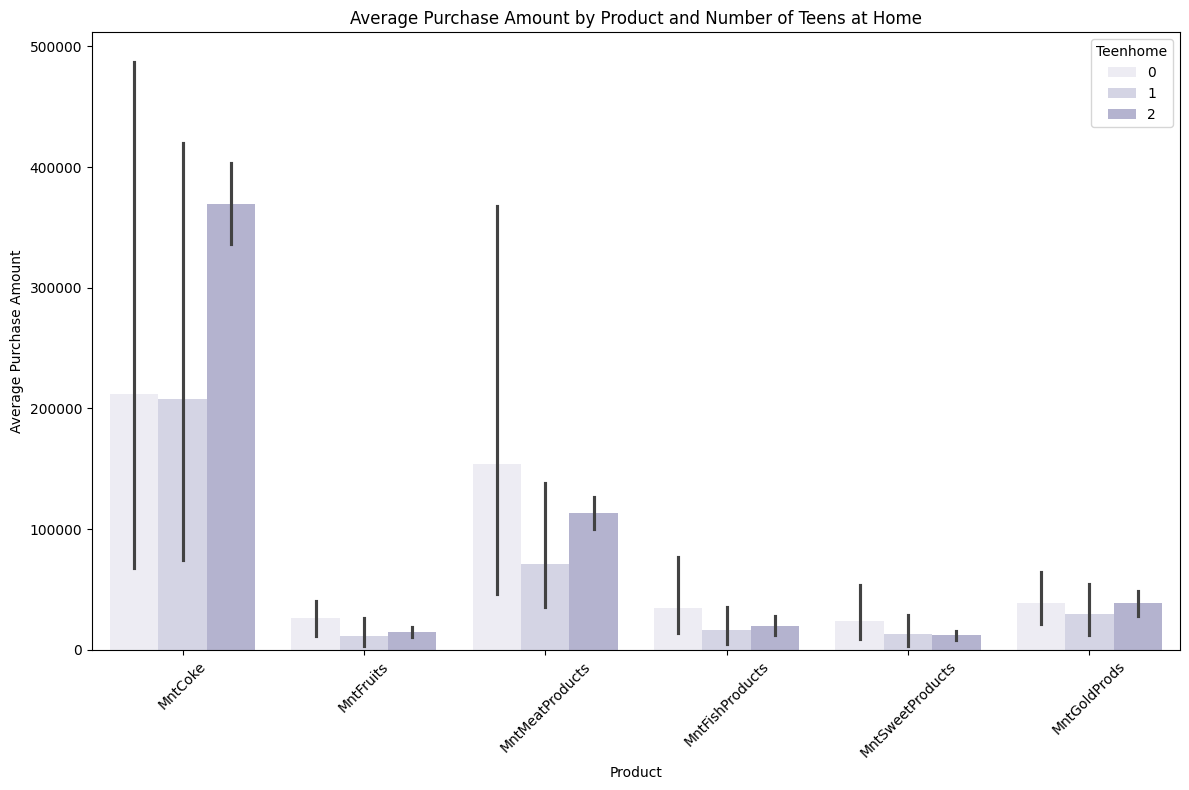

In [16]:
from seaborn import color_palette

# Define color palettes
palette1 = color_palette("Blues")  # Use Blues palette for Kidhome plot
palette2 = color_palette("Purples")  # Use Purples palette for Teenhome plot (corrected typo)

# Plots with color palettes applied
plt.figure(figsize=(12, 8))
sns.barplot(x='Product', y='Average Purchase Amount', hue='Kidhome', data=purchasing_behavior_melted, palette=palette1)
plt.title('Average Purchase Amount by Product and Number of Kids at Home')
plt.xticks(rotation=45)
plt.legend(title='Kidhome')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Product', y='Average Purchase Amount', hue='Teenhome', data=purchasing_behavior_melted, palette=palette2)
plt.title('Average Purchase Amount by Product and Number of Teens at Home')
plt.xticks(rotation=45)
plt.legend(title='Teenhome')
plt.tight_layout()
plt.show()


Observations:

@ The average purchase amount varies depending on the product category and the number of kids at home.
@ Generally, for most product categories, the average purchase amount increases as the number of kids at home increases (from 0 to 2 kids). @This trend is particularly noticeable for MntSweetProducts (sweet products) and MntFruits (fruits).
@MntGoldProds (gold products) seems to have the highest average purchase amount regardless of the number of kids at home.
@MntCoke (coke) and MntFishProducts (fish products) show a smaller increase or even a slight decrease in average purchase amount with more kids at home.

Interpretation:

This chart likely shows the average purchase amount for various product categories (e.g., MntCoke, MntFruits) when there are zero teenagers at home.
The average purchase amount varies depending on the product category.
MntGoldProds (gold products) appears to have the highest average purchase amount, followed by MntMeatProducts (meat products).

In [17]:
# Calculate the total purchase amount for each product category by households with kids and teens
purchasing_behavior['TotalPurchase'] = purchasing_behavior[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [18]:
# Filter households with at least one kid or teen
Total_spent = purchasing_behavior[(purchasing_behavior['Kidhome'] > 0) | (purchasing_behavior['Teenhome'] > 0)]

In [19]:
# Sum the purchase amounts for each product category
product_totals = Total_spent[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=False)
print(product_totals)

MntCoke             275857000
MntMeatProducts     100286000
MntGoldProds         41694000
MntFishProducts      24941000
MntSweetProducts     19375000
MntFruits            18131000
dtype: int64


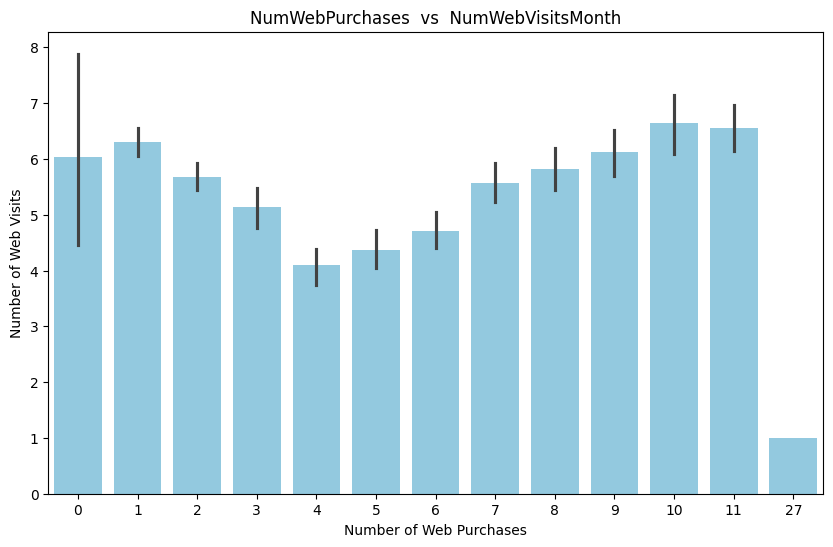

In [20]:
#visualize the bar plot between web purchases and web visits
plt.figure(figsize=(10, 6))
sns.barplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=df, color='skyblue')
plt.title('NumWebPurchases  vs  NumWebVisitsMonth')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Number of Web Visits')
plt.show()

Observations:

The average purchase amount varies depending on the product category.
MntGoldProds (gold products) appears to have the highest average purchase amount, followed by MntMeatProducts (meat products).
MntCoke (coke) and MntFishProducts (fish products) seem to have a lower average purchase amount compared to other categories.
The trends might differ from how the number of kids affects purchase amount (previous chart). Teenagers might have different spending habits compared to kids.
Having more teenagers at home might not significantly influence the purchase of certain staples like meat products.
Overall, the chart provides a snapshot of the average purchase amount for various product categories when there are zero teenagers at home. It would be informative to see charts for Teenhome values greater than 0 to understand how teenagers impact purchasing behavior.

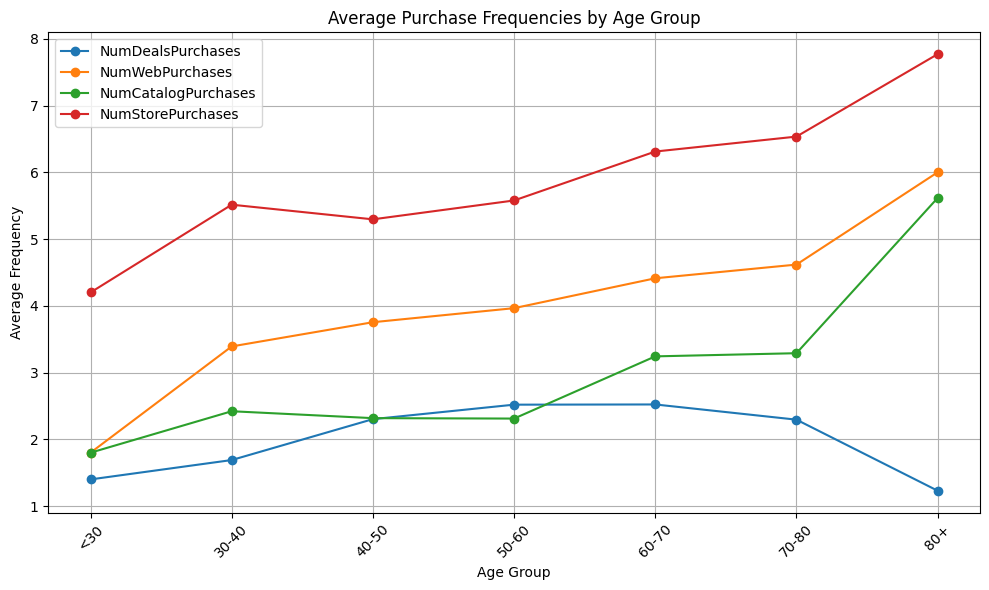

In [21]:
from datetime import datetime
# Calculate age
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Define age groups
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Summarize purchase frequencies for each age group
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Group by AgeGroup and calculate mean for purchase columns
grouped = df.groupby('AgeGroup')[purchase_columns].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6), facecolor='white')
for column in purchase_columns:
    plt.plot(grouped['AgeGroup'], grouped[column], marker='o', label=column)

plt.title('Average Purchase Frequencies by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Frequency')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Convert 'Year_Birth' to age and categorize into age groups
current_year = 2024
df['Age'] = current_year - df['Year_Birth']

# Define age groups
bins = [0, 30, 40, 50, 60, 70, 80, np.inf]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Summarize the response to promotional deals by age group
promo_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df_promo_response = df.groupby('Age_Group')[promo_columns].sum()

print(df_promo_response)

           AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Age_Group                                                           
<30                   0             0             1             0   
30-40                17             1            15            10   
40-50                21             3            38            18   
50-60                20             5            34            39   
60-70                28             9            19            34   
70-80                17             2            11            22   
80+                   2             0             2             2   

           AcceptedCmp5  Response  
Age_Group                          
<30                   0         1  
30-40                19        26  
40-50                22        57  
50-60                35        79  
60-70                15        45  
70-80                22        31  
80+                   3         3  


<ipython-input-23-74ad7847fc4f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_rate.index, y=response_rate.values, palette='viridis')


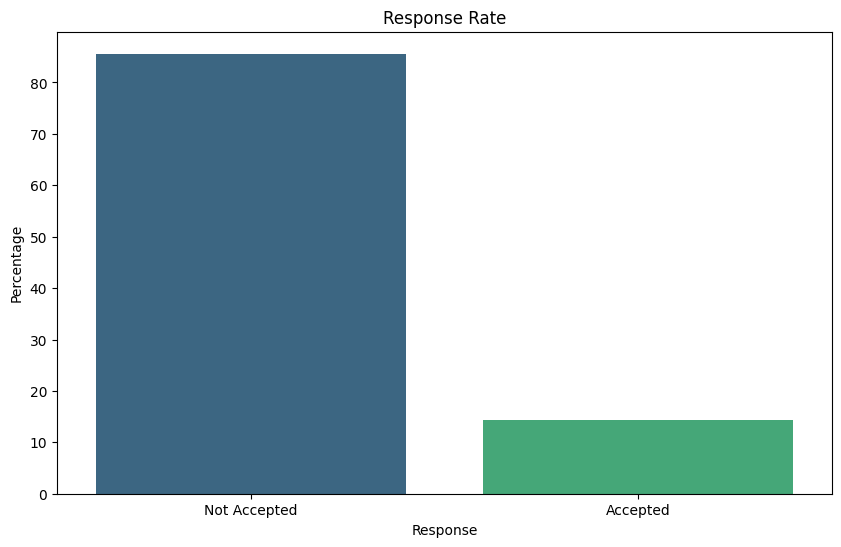

In [23]:
# Response rate
response_rate = df['Response'].value_counts(normalize=True) * 100

# Plotting the response rate
plt.figure(figsize=(10, 6), facecolor='white')
sns.barplot(x=response_rate.index, y=response_rate.values, palette='viridis')
plt.title('Response Rate')
plt.xlabel('Response')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.show()

The line graph that shows the acceptance rate of different comparison groups (Cmp) across various age groups.

Comparison Groups (Cmp): The lines in the graph represent different comparison groups (Cmp1, Cmp2, Cmp3, etc.). These groups are likely different offers or products being compared to the baseline product or offer.

From the graph, it appears that acceptance rates tend to be higher for younger age groups (less than 50 years old) and then decrease for older age groups. Additionally, for most age groups, Cmp4 seems to have the highest acceptance rate, followed by Cmp3, Cmp2, and Cmp1.

In [68]:
# Check the column names in the DataFrame
print(df.columns)

# Verify if the required columns are present
required_columns = ['MntCoke', 'MntMeatProducts']
for col in required_columns:
    if col not in df.columns:
        print(f"Column '{col}' is not present in the DataFrame.")

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'AgeGroup', 'Age_Group',
       'Cluster'],
      dtype='object')


In [24]:
# Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Select features for clustering
numerical_features = ['Income', 'Recency', 'MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','NumDealsPurchases']
categorical_features = ['Education', 'Marital_Status']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [25]:

# Define machine learning models
models = {
  'Logistic Regression': LogisticRegression(max_iter=1000),
  'Support Vector Machine': SVC(probability=True)
}


In [71]:
# Create pipelines for each machine learning model
pipelines = {}
for name, model in models.items():
  pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
  pipelines[name] = pipeline

# Define hyperparameters for GridSearchCV
param_grid = {
  'Logistic Regression': {'classifier__C': [0.1, 1, 10]},
  'Support Vector Machine': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
}


<Axes: >

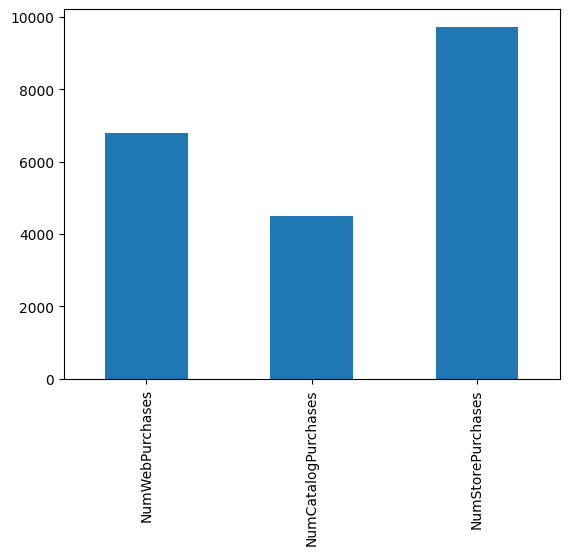

In [27]:
#Average purchase frequencies for each age group
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
visits = data.columns.tolist()[16:19]
data[visits]

data[visits].sum().plot(kind = "bar")


NumWebPurchases: web purchases
NumCatalogPurchases: catalog purchases
NumStorePurchases: store purchases

Overall, it seems like web purchases are the most frequent followed by store purchases and catalog purchases. However, it's difficult to make more specific inferences about average purchase frequencies for each age group without knowing the age ranges and the total number of customers in each age group.

In [28]:
#the response to promotional deals by age group
promo_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df_promo_response = df.groupby('Age_Group')[promo_columns].sum()
print(df_promo_response)

           AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Age_Group                                                           
<30                   0             0             1             0   
30-40                17             1            15            10   
40-50                21             3            38            18   
50-60                20             5            34            39   
60-70                28             9            19            34   
70-80                17             2            11            22   
80+                   2             0             2             2   

           AcceptedCmp5  Response  
Age_Group                          
<30                   0         1  
30-40                19        26  
40-50                22        57  
50-60                35        79  
60-70                15        45  
70-80                22        31  
80+                   3         3  


### ***CLUSTERING***

In [30]:
# Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Select features for clustering
numerical_features = ['Income', 'Recency', 'MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','NumDealsPurchases']
categorical_features = ['Education', 'Marital_Status']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [31]:
# Define K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', kmeans)])

# Fit the model
pipeline.fit(df)

# Get cluster labels
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Add cluster labels to original dataset
data['Cluster'] = cluster_labels

# Explore clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5506.798212  1971.205619  3.523212e+07  0.766284  0.455939   
1        5775.806742  1967.793258  7.592128e+07  0.026966  0.220225   
2        5408.953540  1965.800885  5.754951e+07  0.327434  0.851770   

           Recency        MntCoke     MntFruits  MntMeatProducts  \
Cluster                                                            
0        49.257982   41886.334610   4989.782886     22570.881226   
1        48.391011  594651.685393  68346.067416    452397.752809   
2        49.462389  475252.212389  20402.654867    131659.292035   

         MntFishProducts  ...  NumStorePurchases  NumWebVisitsMonth  \
Cluster                   ...                                         
0            7266.922095  ...           3.214559           6.434227   
1           99851.685393  ...           8.373034           2.775281   
2           26460.1

<ipython-input-31-288e65a88ffa>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


Numeric Features:
StandardScaler() is a transformer that scales numeric features to have a mean of 0 and a standard deviation of 1.

Categorical Features:
OneHotEncoder() is a transformer that converts categorical features into a one-hot encoded representation. This means it creates new binary features for each unique category within the original categorical feature.

2. Combining Transformers:
Transformers is a list of tuples, where each tuple defines how to transform a specific group of features.
.

In essence, this code defines a pre-processing step that takes a dataset with both numeric and categorical features, applies the appropriate scaling or one-hot encoding to each feature type, and prepares the data for use in a machine learning model.

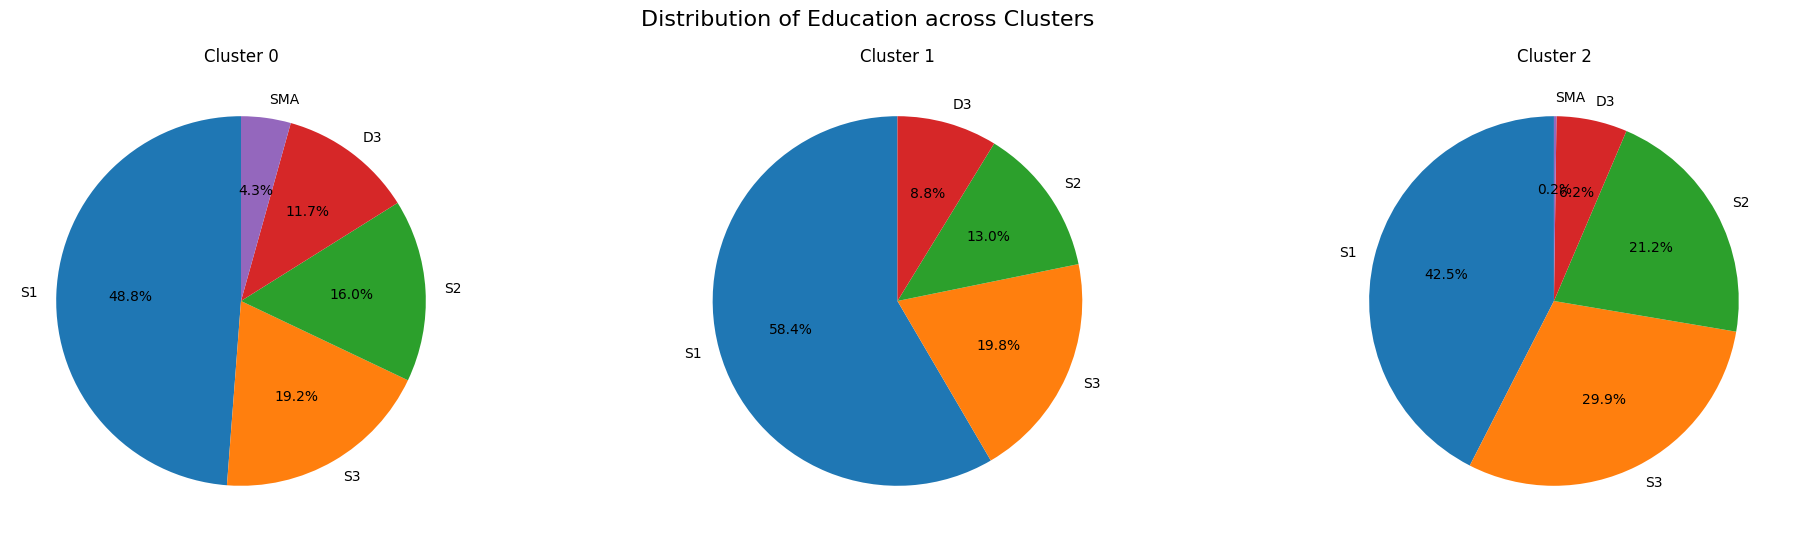

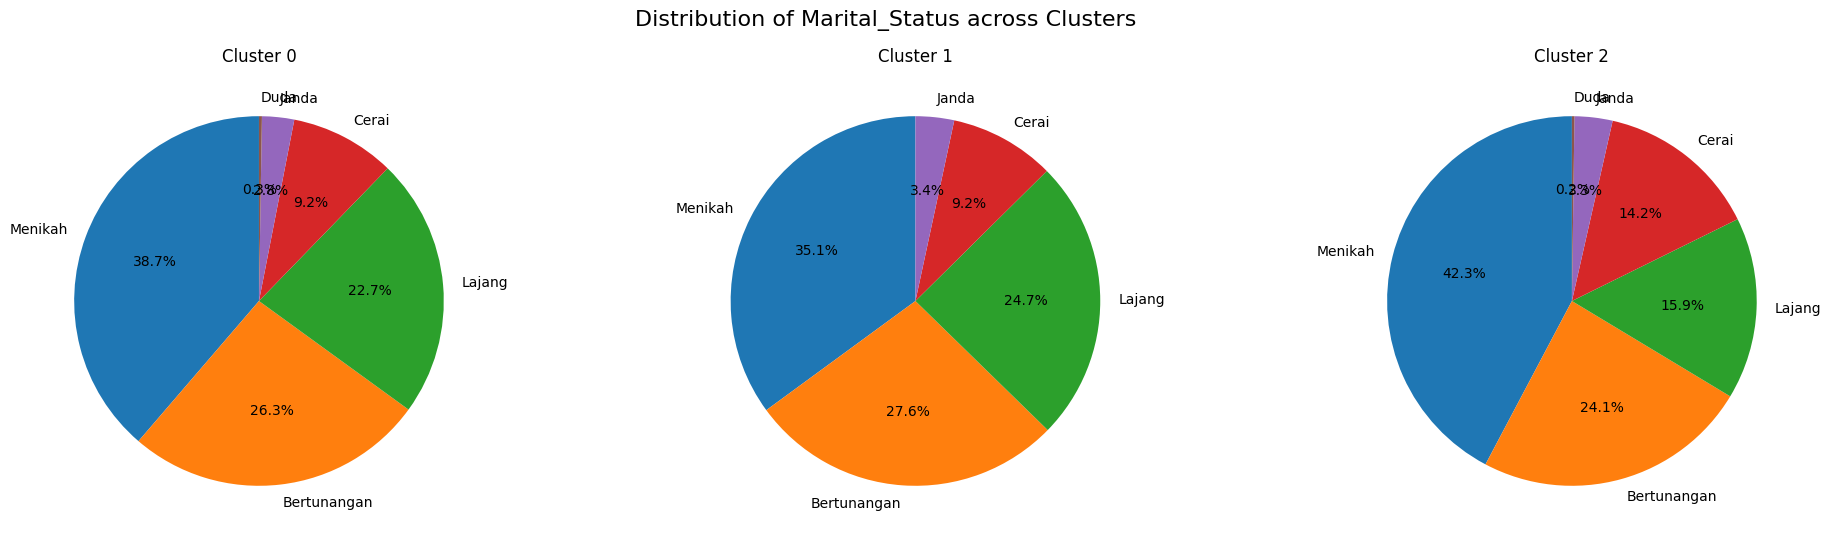

In [45]:
import matplotlib.pyplot as plt

# Define the categorical features to plot
categorical_features = ['Education', 'Marital_Status']

# Set the number of clusters
num_clusters = len(cluster_summary)

# Plot pie charts for each categorical feature
for feature in categorical_features:
    fig, axes = plt.subplots(1, num_clusters, figsize=(8*num_clusters, 6))
    for cluster in range(num_clusters):
        cluster_data = data[data['Cluster'] == cluster]
        cluster_counts = cluster_data[feature].value_counts()
        axes[cluster].pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
        axes[cluster].set_title(f'Cluster {cluster}')
    plt.suptitle(f'Distribution of {feature} across Clusters', fontsize=16)
    plt.show()

## ***The feature to plot***

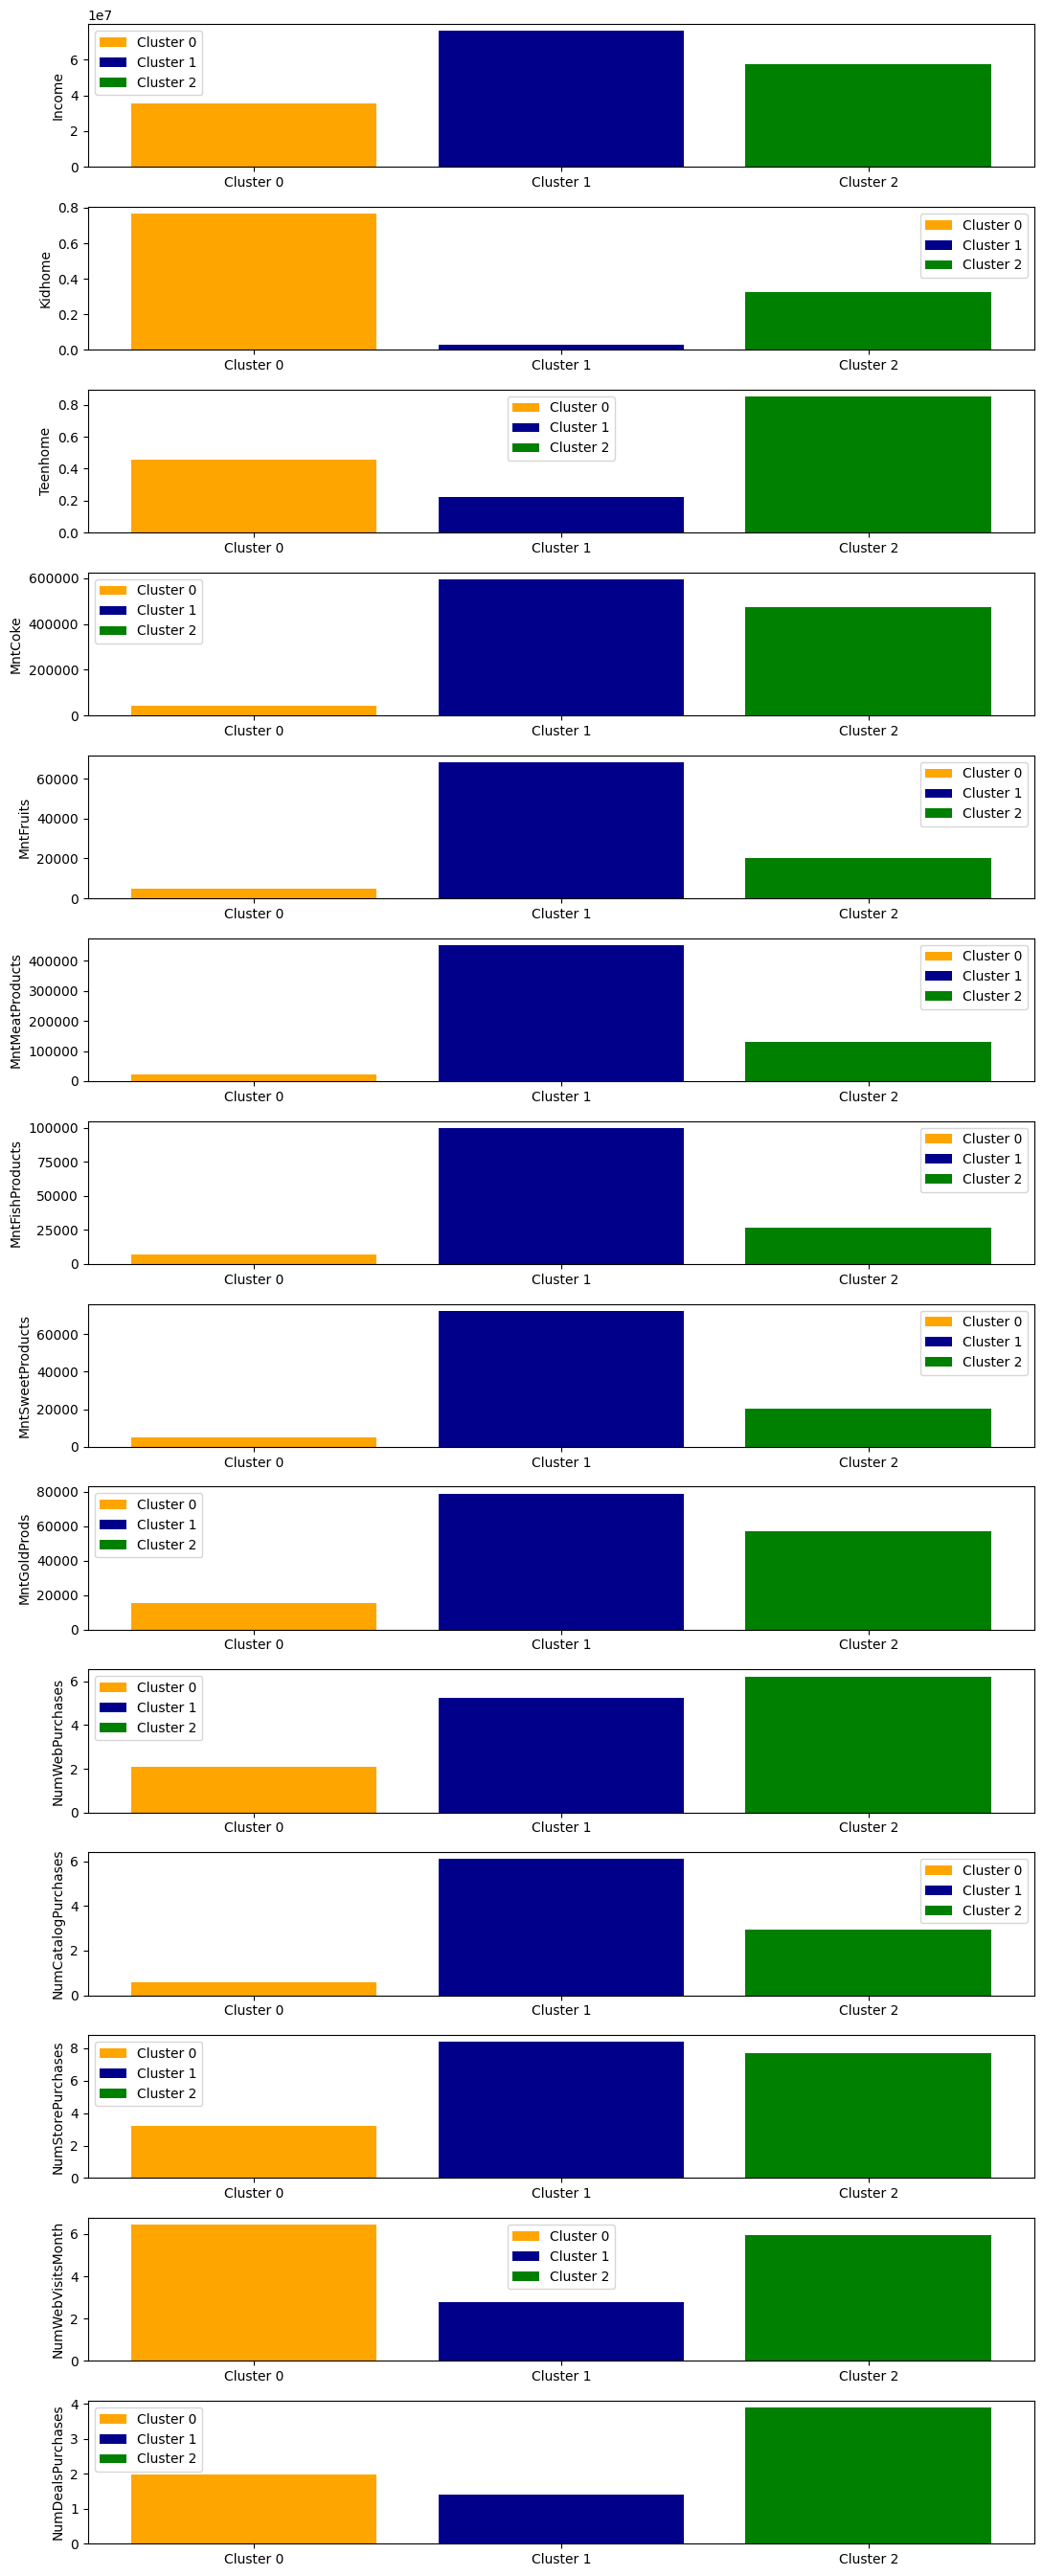

In [32]:
# Define the features to plot
features = ['Income', 'Kidhome', 'Teenhome', 'MntCoke', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']

# Set the number of clusters
num_clusters = len(cluster_summary)

# Define a color list for the clusters
colors = ['orange', 'darkblue', 'green']  # You can change these colors as desired

# Plot each feature for each cluster
fig, axes = plt.subplots(len(features), 1, figsize=(11, 9*num_clusters))
for i, feature in enumerate(features):
    for cluster in range(num_clusters):
        # Use the color list to set the bar color based on the cluster
        axes[i].bar(cluster, cluster_summary.loc[cluster, feature], label=f'Cluster {cluster}', color=colors[cluster])
    axes[i].set_ylabel(feature)
    axes[i].set_xticks(range(num_clusters))
    axes[i].set_xticklabels([f'Cluster {cluster}' for cluster in range(num_clusters)])
    axes[i].legend()

plt.tight_layout()
plt.show()


The average values for several customer features across different customer clusters identified using K-Means clustering.

The information presented in the chart:

Features: The x-axis represents various customer features, including income (Income), if the customer has kids at home (Kidhome), if the customer has teenagers at home (Teenhome), money spent on different product categories (Mnt* columns), and number of purchases made through different channels (Num*Purchases columns).
Clusters: The bars are grouped by customer clusters (Cluster 0, Cluster 1, Cluster 2). These clusters were likely created by K-Means to group customers with similar characteristics.

Average Values: The height of each bar represents the average value for a specific feature within a particular cluster.

Overall, the chart helps visualize how the average values of these features differ between the customer clusters. This can be useful for understanding the characteristics of each cluster and potentially developing targeted marketing strategies.

A collection of pie charts, one for each cluster identified previously using K-Means clustering. It visualizes the distribution of a categorical feature (likely one of the features included in categorical_features) across the clusters.
Categorical Feature: The title above the pie charts mentions "Distribution of AcceptedCmp"

Clusters: Each pie chart represents a customer cluster (Cluster 0, Cluster 1, and Cluster 2).

Distribution: Each pie chart shows the proportion of customers within a cluster that fall into each category of the accepted comparisons.

For instance, in the pie chart for Cluster 0, a large slice labeled "Cmp4" might indicate that a significant portion of customers in Cluster 0 accepted comparison offer Cmp4. Similarly, smaller slices labeled "Cmp1", "Cmp2", and "Cmp3" could indicate that fewer customers in that cluster accepted those comparison offers.Similarly, smaller slices labeled "B" and "C" could indicate that fewer customers in that cluster purchased those product types.

### **LogisticRegression**

In [38]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop(columns=['Response'])
y = df['Response']

# Encode categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Define models with increased max_iter and scaled data
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True)
}

# Create pipeline for each model with scaling
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'Logistic Regression': {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Support Vector Machine': {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
}

# Creating pipeline for each model
pipelines = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipelines[name] = pipeline

# Define hyperparameters
param_grid = {
    'Logistic Regression': {'model__C': [0.1, 1, 10]},
    'Support Vector Machine': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}
}

# Train and tune models
best_models = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Evaluate performance of each model
evaluation_metrics = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    evaluation_metrics[name] = {'Accuracy': accuracy, 'Precision': precision,
                                'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}
# Compare the performance of different models
for name, metrics in evaluation_metrics.items():
    print(f"Performance Metrics for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Performance Metrics for Logistic Regression:
Accuracy: 0.9047619047619048
Precision: 0.6764705882352942
Recall: 0.5227272727272727
F1 Score: 0.5897435897435898
ROC AUC: 0.871497509339975

Performance Metrics for Support Vector Machine:
Accuracy: 0.9047619047619048
Precision: 0.7142857142857143
Recall: 0.45454545454545453
F1 Score: 0.5555555555555556
ROC AUC: 0.863714196762142



**Accuracy:** Both models achieve very high accuracy (around 90.5%), indicating they perform well in correctly classifying instances.

**Precision: **SVM has slightly higher precision (0.714) compared to Logistic Regression (0.676). Precision tells you the proportion of positive predictions that were truly positive. So, SVM is better at avoiding false positives (predicting a positive class when it's actually negative).

**Recall:** Logistic Regression has a better recall (0.523) compared to SVM (0.455). Recall measures the proportion of actual positive cases that were correctly identified. So, Logistic Regression is better at capturing true positives and avoiding false negatives (missing actual positive cases).

**F1 Score:** Both models have similar F1 scores (around 0.58-0.59), which is a harmonic mean of precision and recall, providing a balanced view of both metrics.

**ROC AUC:** Logistic Regression has a slightly higher ROC AUC (0.871) compared to SVM (0.864). ROC AUC is a measure of a model's ability to distinguish between classes. A higher value indicates better performance in differentiating positive from negative cases.

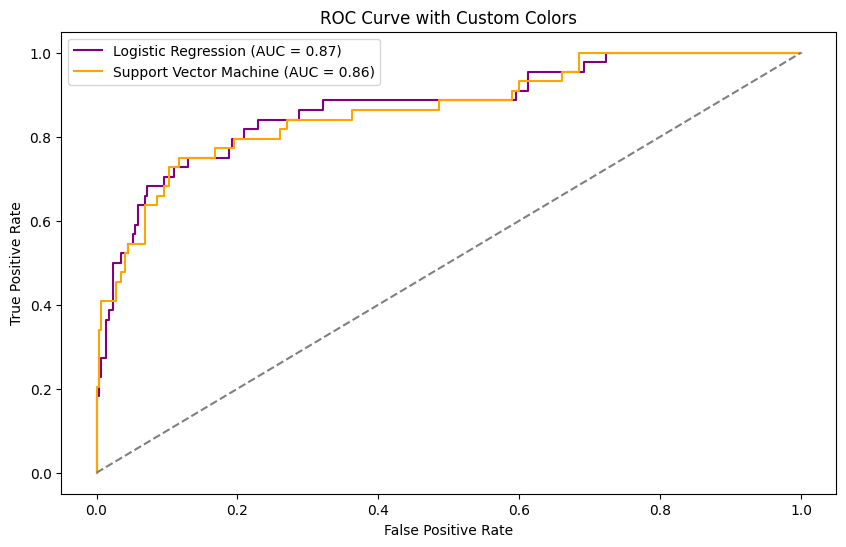

In [42]:
# Plot ROC curves and calculate AUC
# Color list for ROC curves
colors = ['purple', 'orange', 'green']  # Adjust this list as desired

plt.figure(figsize=(10, 6))

for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    # Assign a unique color to each curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})', color=colors.pop(0))

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Keep the diagonal line gray
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Custom Colors')
plt.legend()
plt.show()

The ROC curve is a graph that shows the relationship between the false positive rate and the true positive rate.  Overall, the ROC curve in the image is a helpful tool for visualizing and comparing the performance of two classification models. In this case, Logistic Regression appears to have a slightly better performance than SVM based on a higher AUC.

In [67]:
#the model with the best performance based on evaluation metrics
best_model_name = max(evaluation_metrics, key=lambda k: evaluation_metrics[k]['ROC AUC'])
best_model = best_models[best_model_name]
print(f"The best model is: {best_model_name}")

The best model is: Logistic Regression


**Conclusion:**
Both models achieve very high accuracy (**around 90.5%)**, suggesting they are effective in correctly classifying instances.  However, there are some key differences in their performance based on other metrics:

**Precision:** SVM has a slight edge (0.714) over Logistic Regression (0.676). This means SVM is better at avoiding false positives (predicting a positive class when it's actually negative).

**Recall: **Logistic Regression performs better (0.523) compared to SVM (0.455). This indicates Logistic Regression is more adept at capturing true positives (identifying all actual positive cases) and avoiding false negatives (missing actual positive cases).

**F1 Score:**Both models have similar F1 scores (around 0.58-0.59), suggesting a trade-off between precision and recall.

**ROC AUC:** Logistic Regression has a slightly higher ROC AUC (0.871) compared to SVM (0.864). This implies Logistic Regression might be better at differentiating between positive and negative cases overall.